In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

df = pd.read_csv('C:/Users/Shahrukh/python/data sets/Laptop Price Prediction.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [5]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [6]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

  - there are no null values

In [7]:
# removing 'GB' and 'kg' from Ram and Weight columns respectively

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting data types

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

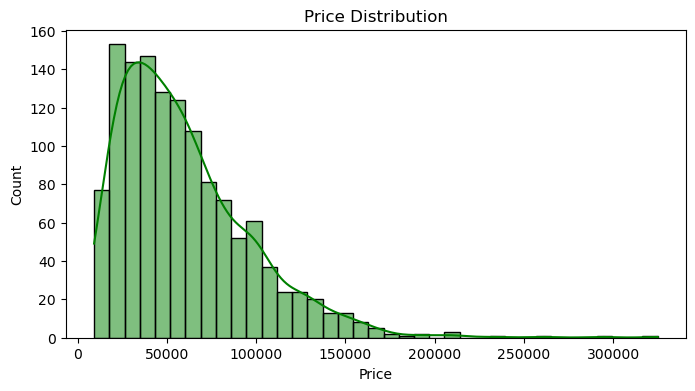

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(x=df['Price'],color='Green',kde=True)
plt.title('Price Distribution')
plt.show()

<Figure size 500x300 with 0 Axes>

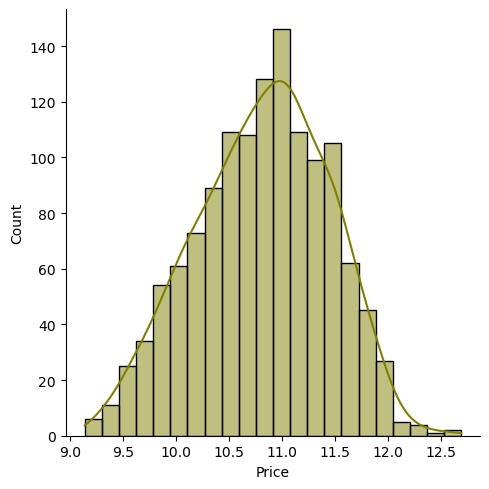

In [10]:
plt.figure(figsize=(5,3))
sns.displot(np.log(df['Price']),color='olive',kde=True)
plt.show()

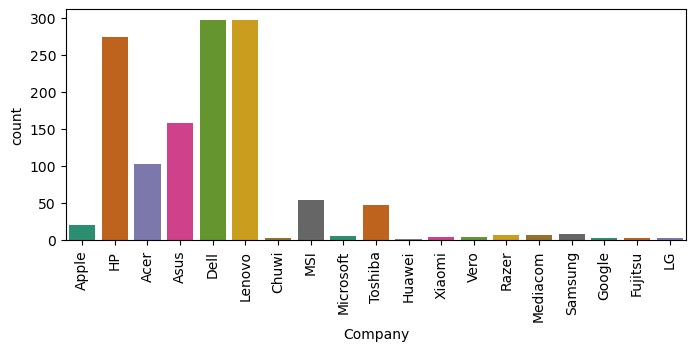

In [11]:
# count plot for Company

plt.figure(figsize=(8,3))
sns.countplot(x=df['Company'],data=df,palette='Dark2')
plt.xticks(rotation=90)
plt.show()

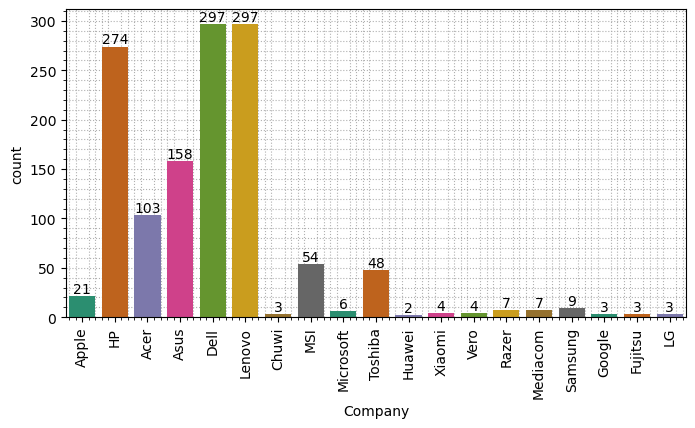

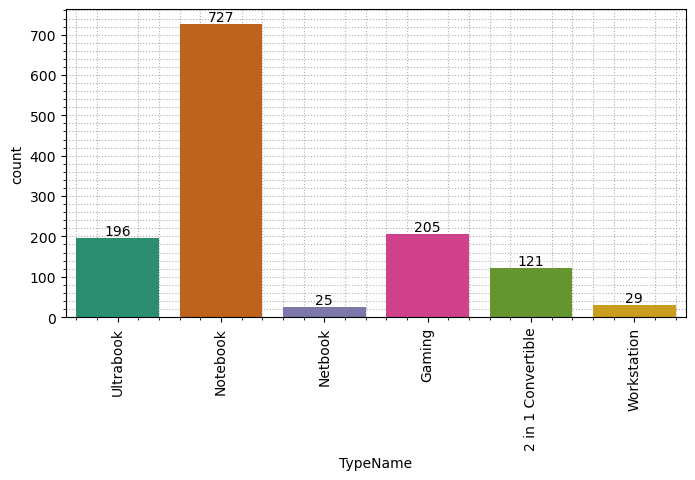

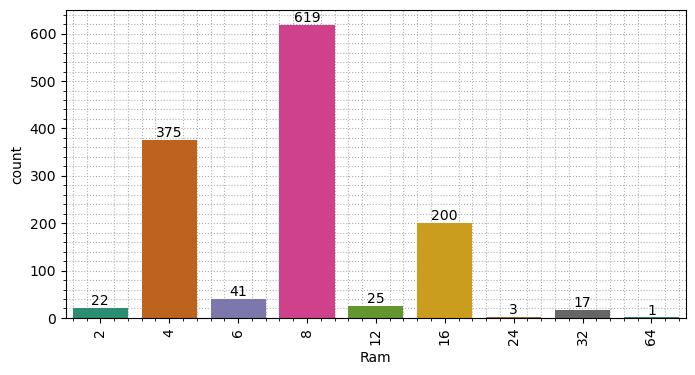

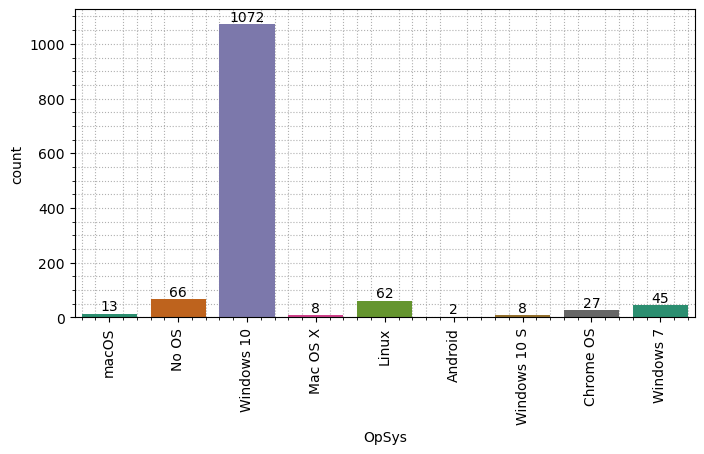

In [12]:
# plotting countplots for different columns

def draw_plots(cols):
    plt.figure(figsize=(8,4))
    plt.grid(which='both',axis='both',linestyle='dotted',zorder=0) ### zorder of grid should be less than the barplot
    plt.minorticks_on()
    ax = sns.countplot(x=df[cols],palette='Dark2',zorder=2)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xticks(rotation=90)
    plt.show()
    
cols_to_view = ['Company', 'TypeName', 'Ram','OpSys']
for cols in cols_to_view:
    draw_plots(cols)

### Observations from above plots
 - Dell and Levono & HP are the Laptops that are sold the most.
 - The type of laptop people prefer more is the Notebook type.
 - Laptops with lower ram like 4GB and 8GB are sold more.
 - Laptops operating on Windows 10 are preferred more.

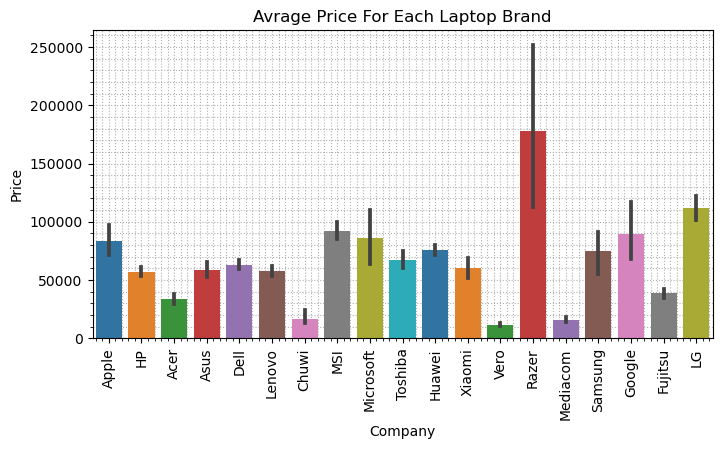

In [13]:
# average price for each Laptop company

plt.figure(figsize=(8,4))
sns.barplot(x=df['Company'],y=df['Price'],palette='tab10',zorder=2)

# enabling background grid
plt.grid(which='both',axis='both',linestyle='dotted',zorder=0) ### zorder of grid should be less than the barplot
plt.minorticks_on()

plt.title('Avrage Price For Each Laptop Brand')
plt.xticks(rotation=90)
plt.show()

 - Razer brand Laptops have the highest prices

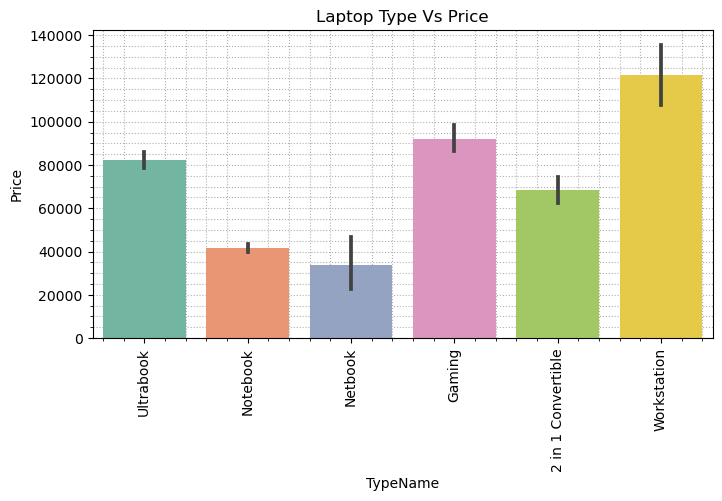

In [14]:
# Laptop Types and variation in their prices

plt.figure(figsize=(8,4))
plt.grid(which='both',linestyle='dotted',zorder=0)
plt.minorticks_on()
sns.barplot(x=df['TypeName'],y=df['Price'],palette='Set2',zorder=2)
plt.title('Laptop Type Vs Price')
plt.xticks(rotation=90)
plt.show()

 - Workstation type of laptops have higher price ranges

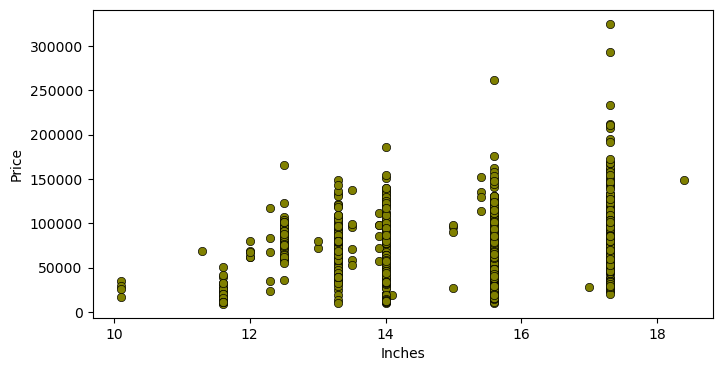

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Inches'],y=df['Price'],color='olive',edgecolor='black')
plt.show()

 - the average price range for laptops from 12-18 inches is 50000 to 150000

### For the Screen Resolution column we have many types of Screen Resolutions out there as shown 'TouchScreen' and 'Normal' and 'IPS Panel'.

In [16]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [17]:
#  let us see the laptops with touch screens

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
985,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.25,31914.720,0
1043,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,55922.688,0
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.920,0
1170,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.96,36177.120,0
726,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.20,38308.320,0


In [18]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


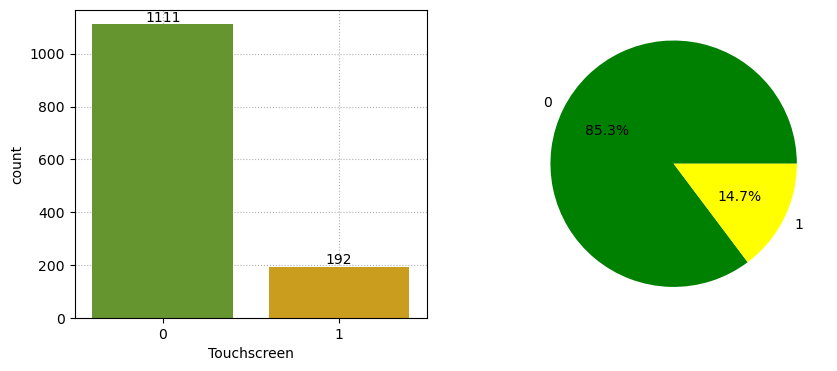

In [19]:
# countplot and pie for Touchscreen laptops

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1 = sns.countplot(x=df['Touchscreen'],palette=sns.color_palette('Dark2')[4:6],zorder=2,ax=ax1)
ax1.bar_label(ax1.containers[0],label_type='edge')
ax1.grid(which='both',axis='both',linestyle='dotted',zorder=0)
ax2.pie(df['Touchscreen'].value_counts(),labels=df['Touchscreen'].unique(),autopct='%1.1f%%',colors=('green','yellow'))
plt.grid(which='both',axis='both',linestyle='dotted',zorder=0)
plt.show()

 - around 14 % of laptops are Touchscreen

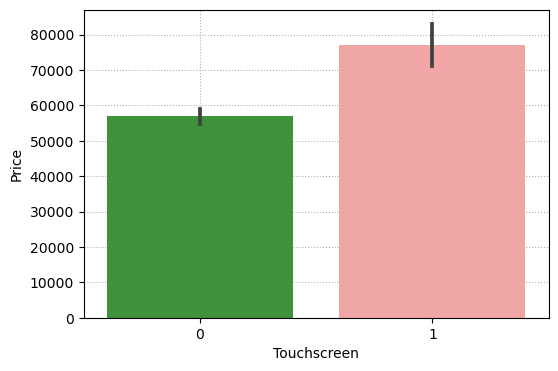

In [20]:
# touch screen on comparision with price of laptop

plt.figure(figsize=(6,4))
ax = sns.barplot(x=df['Touchscreen'],y=df['Price'],palette=sns.color_palette('Paired')[3:5],zorder=2)
plt.grid(which='both',linestyle='dotted',axis='both',zorder=0)      
plt.show()

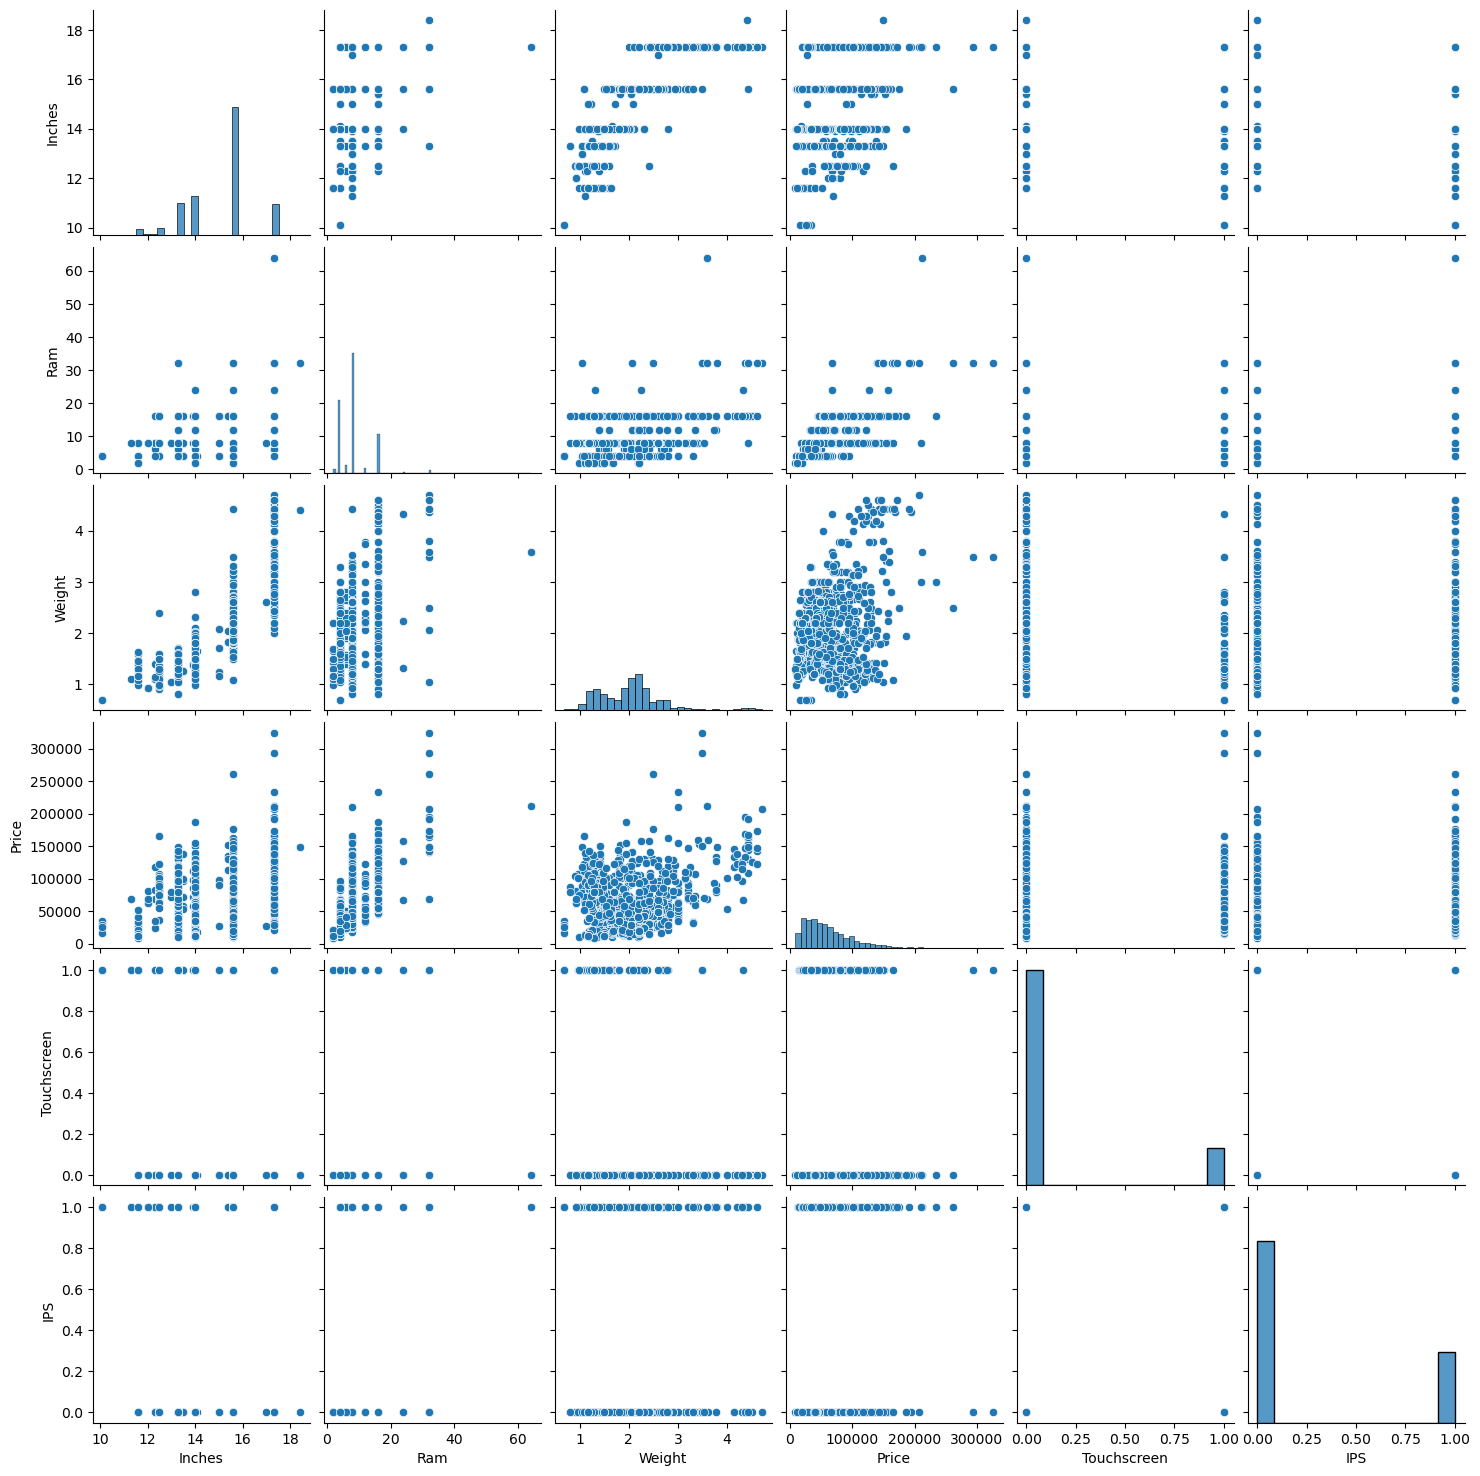

In [21]:
sns.pairplot(df,)

## Extracting the X Resolution and the Y Resolution

In [22]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

split_df = df['ScreenResolution'].str.split('x',expand=True)
split_df.head(3)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080


In [23]:
df['X_res'] = split_df[0]
df['Y_res'] = split_df[1]
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [24]:
df['X_res'] = df['X_res'].str[-4:]
df['X_res'].str.strip()
df['X_res'].unique()

array(['2560', '1440', '1920', '2880', '1366', '2304', '3200', '2256',
       '3840', '2160', '1600', '2736', '2400'], dtype=object)

In [25]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [26]:
# let us find Pixel Per Inches (PPI)
# PPI = (diagonal screensize)/(display size in inches)
# where, diagonal screensize = sqrt_root((X_res)^2+(Y_res)^2)

df['PPI'] = ((df['X_res']**2+df['Y_res']**2)**0.5)/df['Inches']
df['PPI'] = df['PPI'].astype('float32')

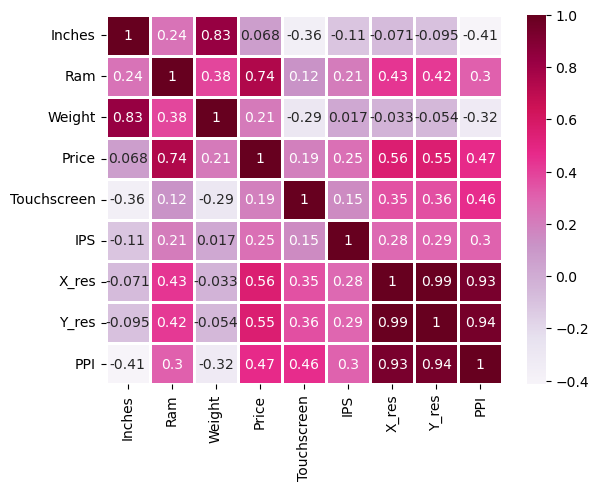

In [27]:
sns.heatmap(df.corr(),annot=True,cmap='PuRd',linecolor='white',linewidths=1)
plt.show()

#### - We observe from the above correlation chart that the PPI is having good correlation,so we will be using that,as it is  a    combination of 3 features Inches, X_res and Y_res and that gives collective results of 3 columns.
#### - Hence we will drop the three columns Inches, X_res and Y_res.

In [28]:
df.drop(columns=['Inches','X_res','Y_res'],axis=1,inplace=True)
df.head(3)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006


In [29]:
df.drop(columns='ScreenResolution',axis=1,inplace=True)

### Now we will work on CPU column,as that also has much text data and we need to process it efficiently as we may get good insights from them

In [30]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [31]:
df['CPU_type'] = df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_type
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


In [32]:
def processor(cpu_type):
    if cpu_type=='Intel Core i3' or cpu_type=='Intel Core i5' or cpu_type=='Intel Core i7':
        return cpu_type
    elif cpu_type.split()[0]=='Intel':
        return 'Other Intel Processor'
    elif cpu_type.split()[0]=='Samsung':
        return 'Samsung Processor'
    elif cpu_type.split()[0]=='AMD':
        return 'AMD Processor'
    
df['CPU_type'] = df['CPU_type'].apply(lambda cpu_type:processor(cpu_type))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_type
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


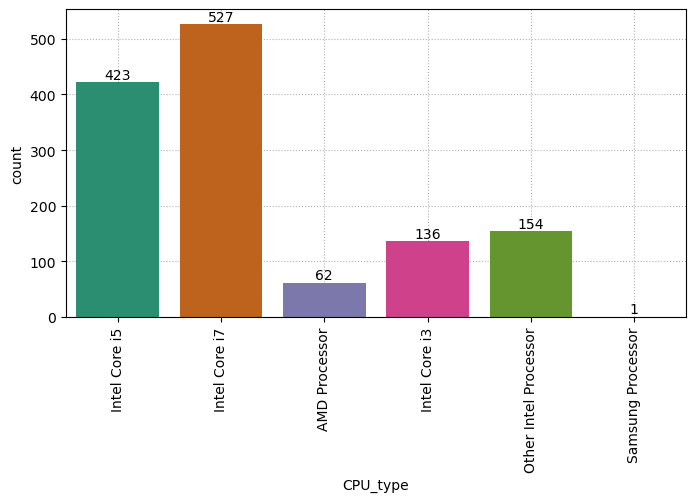

In [33]:
# countplot for cpu type

plt.figure(figsize=(8,4))
ax = sns.countplot(x=df['CPU_type'],palette='Dark2',zorder=2)
plt.grid(which='both',linestyle='dotted',axis='both',zorder=0)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xticks(rotation=90)
plt.show()

In [34]:
df.drop(columns='Cpu',axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


### Analysis on GPU column

In [35]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [36]:
def gpu_category(gpu):
    if gpu.split()[0]=='Intel':
        return 'Intel'
    elif gpu.split()[0]=='Nvidia':
        return 'Nvidia'
    elif gpu.split()[0]=='AMD':
        return 'AMD'
    elif gpu.split()[0]=='ARM':
        return 'ARM'
    
df['GPU Brand'] = df['Gpu'].apply(lambda gpu:gpu_category(gpu))
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel


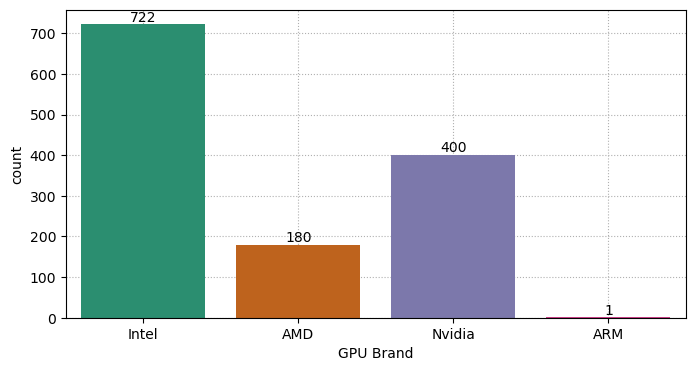

In [37]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['GPU Brand'],palette="Dark2",zorder=2)
plt.grid(which='both',linestyle='dotted',axis='both',zorder=0)
ax.bar_label(ax.containers[0],label_type='edge')
plt.show()

In [38]:
df.drop(columns='Gpu',axis=1,inplace=True)

In [39]:
df.head(2)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel


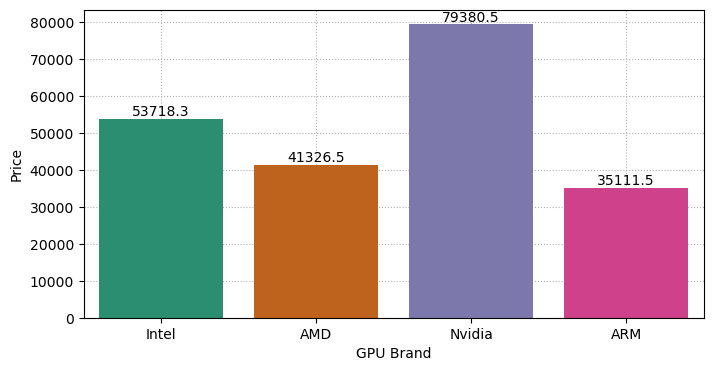

In [40]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['GPU Brand'],y=df['Price'],palette="Dark2",ci=None,zorder=2)
plt.grid(which='both',linestyle='dotted',axis='both',zorder=0)
ax.bar_label(ax.containers[0],label_type='edge')
plt.show()

### analysis on OpSys column

In [41]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [42]:
def op_sys(sys):
    if sys.split()[0]=='Windows':
        return 'Windows'
    elif sys.split()[0]=='Mac' or sys.split()[0]=='macOS':
        return 'Mac'
    else:
        return 'Other OpSys'
    
df['Operating System'] = df['OpSys'].apply(lambda sys:op_sys(sys))
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,Intel,Mac


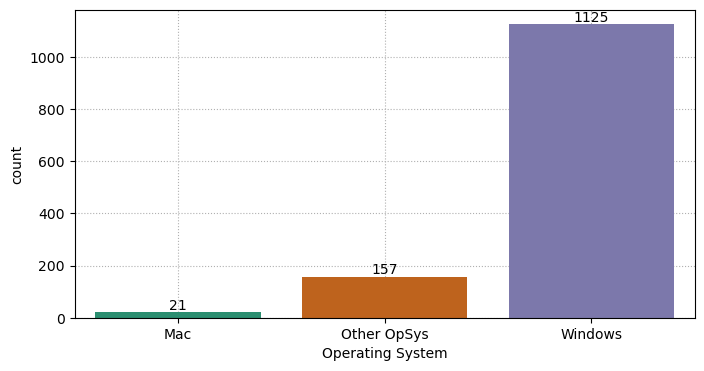

In [43]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Operating System'],palette='Dark2',zorder=2)
plt.grid(which='both',linestyle='dotted',axis='both',zorder=0)
ax.bar_label(ax.containers[0],label_type='edge')
plt.show()

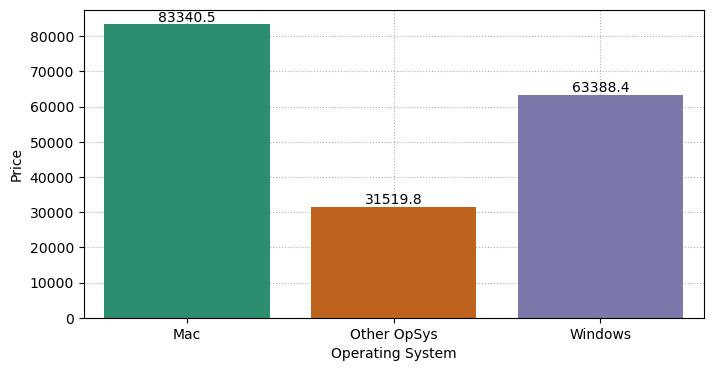

In [44]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['Operating System'],y=df['Price'],ci=None,palette='Dark2',zorder=2)
plt.grid(which='both',linestyle='dotted',axis='both',zorder=0)
ax.bar_label(ax.containers[0],label_type='edge')
plt.show()

In [45]:
df.drop(columns='OpSys',axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534622,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983002,Intel Core i5,Intel,Mac


### Analysis on memory column

In [46]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [47]:
## There are 4 most common variants observed : HHD,SSD,Flash,Hybrid

# we will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)

# replacing 'GB' with ""
df['Memory'] = df['Memory'].str.replace('GB','')

# replacing 'TB' with '000'
df['Memory'] = df['Memory'].str.replace('TB','000')

# splitting the column across '+' sign
temp_df = df['Memory'].str.split('+',expand=True)
temp_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [48]:
# lets remove the white spaces 

df['one'] = temp_df[0]
df['one'] = df['one'].str.strip()
df.head(3)

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,one
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,128 Flash Storage
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys,256 SSD


In [49]:
def changes(mem_type):
    df['1_'+mem_type] = df['one'].apply(lambda x:1 if mem_type in x else 0)
    
    
list_to_apply_changes = ['HDD','SSD','Flash','Hybrid']
for mem_type in list_to_apply_changes:
    changes(mem_type)
    
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,one,1_HDD,1_SSD,1_Flash,1_Hybrid
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,128 Flash Storage,0,0,1,0
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534622,Intel Core i7,AMD,Mac,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983002,Intel Core i5,Intel,Mac,256 SSD,0,1,0,0


In [50]:
#  removing all the characters just keep the numbers

df['one'] = df['one'].str.replace(r'\D','')
df.head(5)

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,one,1_HDD,1_SSD,1_Flash,1_Hybrid
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac,128,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,128,0,0,1,0
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys,256,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534622,Intel Core i7,AMD,Mac,512,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983002,Intel Core i5,Intel,Mac,256,0,1,0,0


In [51]:
df['two'] = temp_df[1]
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,one,1_HDD,1_SSD,1_Flash,1_Hybrid,two
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,128,0,0,1,0,None
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534622,Intel Core i7,AMD,Mac,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983002,Intel Core i5,Intel,Mac,256,0,1,0,0,None


In [52]:
df['two'] = df['two'].fillna('0')
df.head(3)

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,one,1_HDD,1_SSD,1_Flash,1_Hybrid,two
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac,128,0,1,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,128,0,0,1,0,0
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys,256,0,1,0,0,0


In [53]:
def changes_2(mem_type):
    df['2_'+mem_type] = df['two'].apply(lambda x:1 if mem_type in x else 0)
    
list_to_apply_changes_2 = ['HDD','SSD','Flash','Hybrid']
for mem_type in list_to_apply_changes_2:
    changes_2(mem_type)
    
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,CPU_type,...,one,1_HDD,1_SSD,1_Flash,1_Hybrid,two,2_HDD,2_SSD,2_Flash,2_Hybrid
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983002,Intel Core i5,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,141.212006,Intel Core i5,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,220.534622,Intel Core i7,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,226.983002,Intel Core i5,...,256,0,1,0,0,0,0,0,0,0


In [54]:
# removing all the characters and keeping just the numbers

df['two'] = df['two'].str.replace(r'\D','')
df['two'].unique()

array(['0', '1000', '256', '2000', '500', '512'], dtype=object)

In [55]:
df['one'] = df['one'].astype('int')
df['two'] = df['two'].astype('int')

In [56]:
# multiplying the elements and storing in one column

df['HDD'] = (df['one']*df['1_HDD']+df['two']*df['2_HDD'])
df['SSD'] = (df['one']*df['1_SSD']+df['two']*df['2_SSD'])
df['Flash_Storage'] = (df['one']*df['1_Flash']+df['two']*df['2_Flash'])
df['Hybrid'] = (df['one']*df['1_Hybrid']+df['two']*df['2_Hybrid'])

# dropping the unnessecary columns

df.drop(columns=['one','two','1_HDD','1_SSD', '1_Flash', '1_Hybrid',
       'two', '2_HDD', '2_SSD', '2_Flash', '2_Hybrid'],inplace=True)

In [57]:
df.drop(columns='Memory',axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983002,Intel Core i5,Intel,Mac,0,128,0,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0,128,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.212006,Intel Core i5,Intel,Other OpSys,0,256,0,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534622,Intel Core i7,AMD,Mac,0,512,0,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983002,Intel Core i5,Intel,Mac,0,256,0,0


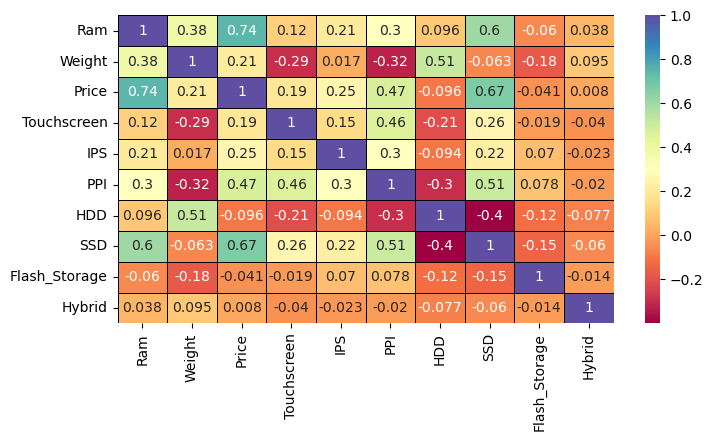

In [58]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',linecolor='black',linewidths=0.7)
plt.show()

# Label Encoding

In [59]:
# Handelling categorical columns

df.select_dtypes('object').columns.to_list()

['Company', 'TypeName', 'CPU_type', 'GPU Brand', 'Operating System']

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df[['Company', 'TypeName', 'CPU_type', 'GPU Brand', 'Operating System']] = df[['Company', 'TypeName', 'CPU_type', 'GPU Brand', 
                                                                               'Operating System']].apply(encoder.fit_transform)

df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU_type,GPU Brand,Operating System,HDD,SSD,Flash_Storage,Hybrid
0,1,4,8,1.37,71378.6832,0,1,226.983002,2,2,0,0,128,0,0
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,2,0,0,0,128,0
2,7,3,8,1.86,30636.0000,0,0,141.212006,2,2,1,0,256,0,0
3,1,4,16,1.83,135195.3360,0,1,220.534622,3,0,0,0,512,0,0
4,1,4,8,1.37,96095.8080,0,1,226.983002,2,2,0,0,256,0,0


## Model Building

In [61]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df,test_size=0.2,random_state=42)

## Scaling columns

In [62]:
cols_to_scale = ['Weight','Price','PPI']

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scaling training data
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])


# scaling testing data
test_df[cols_to_scale] = scaler.fit_transform(test_df[cols_to_scale])

# Training the model

In [64]:
# Separating the target variable from the training dataset

x_train = train_df.drop(columns='Price',axis=1)
y_train = train_df['Price']

# Separating the target variable from the test dataset

x_test = test_df.drop(columns='Price',axis=1)
y_test = test_df['Price']

# 1. Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(x_train,y_train)
y_pred_linear_reg = linear_reg.predict(x_test)

linear_reg.score(x_train,y_train)

0.6936019774283245

###### Checking R squared value & Mean Absolute Error

In [66]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_linear_reg)

0.5951922090047115

In [67]:
# mean abaolut error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_linear_reg)

0.05874743946862259

 - the Mean Absolute error is 0.058
 - model predicts +-0.058 more/less than the original price!

#  2. Ridge Regression

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)

ridge.score(x_train,y_train)

0.6934111644423839

###### Checking R squared value & Mean Absolute Error

In [69]:
# r2 score
r2_score(y_test,y_pred_ridge)

0.6000957001369223

In [70]:
# mean absolute error
mean_absolute_error(y_test,y_pred_ridge)

0.05847316356689358

# Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

lasso.score(x_train,y_train)

0.4789012869884419

###### Checking R squared value & Mean Absolute Error

In [72]:
# r2 score
r2_score(y_test,y_pred_lasso)

0.4517263356191691

In [73]:
# mean absolute error
mean_absolute_error(y_test,y_pred_lasso)

0.0675914892311232

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(x_train,y_train)
y_pred_tree = tree.predict(x_test)

tree.score(x_train,y_train)

0.9942910676189523

###### Checking R squared value & Mean Absolute Error

In [75]:
# r2 score
r2_score(y_test,y_pred_tree)

0.35015520875680683

In [76]:
# mean absolute error
mean_absolute_error(y_test,y_pred_tree)

0.06157391406327729

# Random Forest 

In [77]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(x_train,y_train)
y_pred_forest = forest.predict(x_test)

forest.score(x_train,y_train)

0.9683009500421695

In [78]:
# r2 score 
r2_score(y_test,y_pred_forest)

0.67794080631684

In [79]:
# mean absolute error
mean_absolute_error(y_test,y_pred_forest)

0.046781298180812086

# Putting all the models in single function

In [80]:
model_list = [linear_reg,ridge,lasso,tree,forest]
model_names = ['Linear Reg','Ridge Reg','Lasso Reg','Decision Tree','Random Forest']

for model in model_list:
    model.fit(x_train,y_train)
    
r2_score_list = []

for model,name in zip(model_list,model_names):
    y_predictions = model.predict(x_test)
    
    print(name,':','\n','r2_score:',r2_score(y_test,y_predictions),'\n\n')
    
    r2_score_list.append(r2_score(y_test,y_predictions))

Linear Reg : 
 r2_score: 0.5951922090047115 


Ridge Reg : 
 r2_score: 0.6000957001369223 


Lasso Reg : 
 r2_score: 0.4517263356191691 


Decision Tree : 
 r2_score: 0.32481923788813205 


Random Forest : 
 r2_score: 0.6711772525023966 




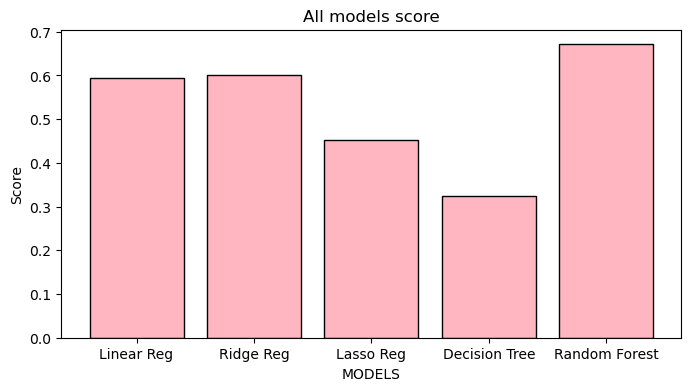

In [81]:
plt.figure(figsize=(8,4))
plt.title('All models score')
plt.xlabel('MODELS')
plt.ylabel('Score')
x = np.arange(5)

plt.bar(x,r2_score_list,color='lightpink',edgecolor='black')
plt.xticks(x,model_names)
plt.show()

# 
- random forest gives better results 

# Comparing the actual and predicted values

In [82]:
# reshape y_test to a matrix with single column
y_test_matrix = y_test.values.reshape(-1,1)

In [83]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual':y_test_matrix.flatten(),'predicted':y_pred_forest.flatten()})
data_frame.head(10)

,actual,predicted
0,0.249661,0.231086
1,0.161017,0.231505
2,0.050847,0.079862
3,0.118644,0.147067
4,0.177119,0.209233
5,0.203388,0.259092
6,0.088136,0.127929
7,0.044068,0.065010
8,0.168136,0.278407
9,0.025424,0.072241


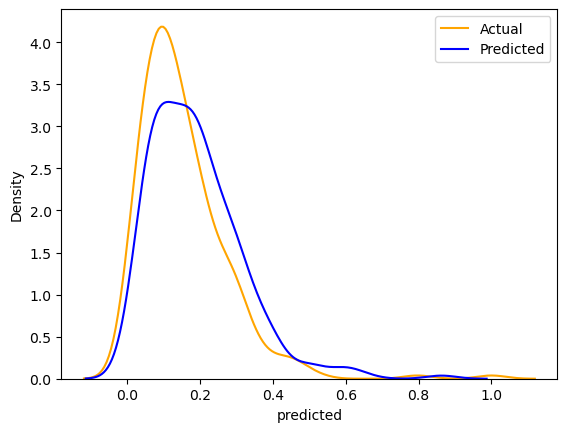

In [84]:
sns.distplot(data_frame['actual'],hist=False,color='orange',label='Actual')
sns.distplot(data_frame['predicted'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()